<a href="https://colab.research.google.com/github/mohiteprathamesh1996/House-Prices-Advanced-Regression-/blob/main/prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Predict House Prices using Sklearn Pipeline

#### Importing packages

In [9]:
import pandas as pd
pd.options.display.max_rows = 999
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Load data

In [22]:
df_price = pd.concat([pd.DataFrame(load_boston().data, 
                                   columns = load_boston().feature_names),
                      pd.DataFrame(load_boston().target, 
                                   columns = ["Price"])], axis=1)

#### Check for missing data

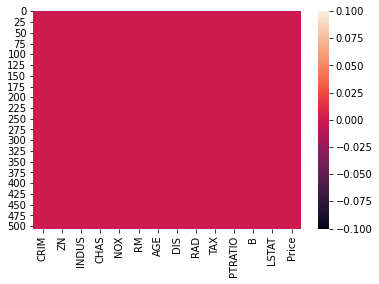

In [25]:
sns.heatmap(df_price.isna()); plt.show()

#### Check for outliers

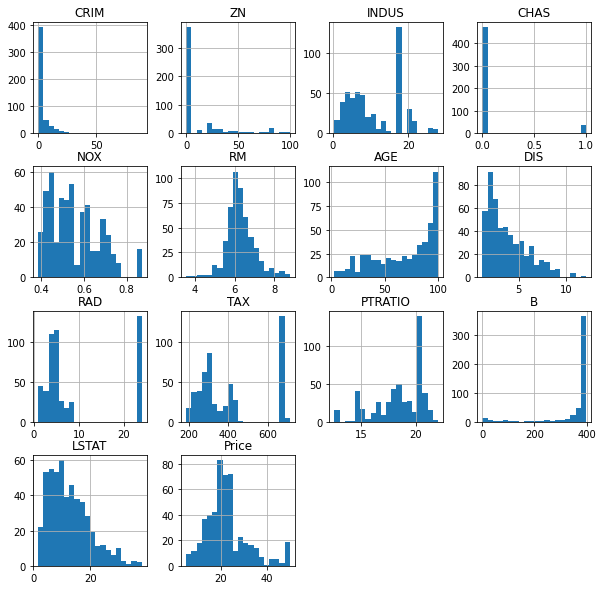

In [28]:
df_price.hist(figsize=(10,10), bins=20); plt.show()

#### Check and drop for highly correlated features (where absolute correlation > 0.75)

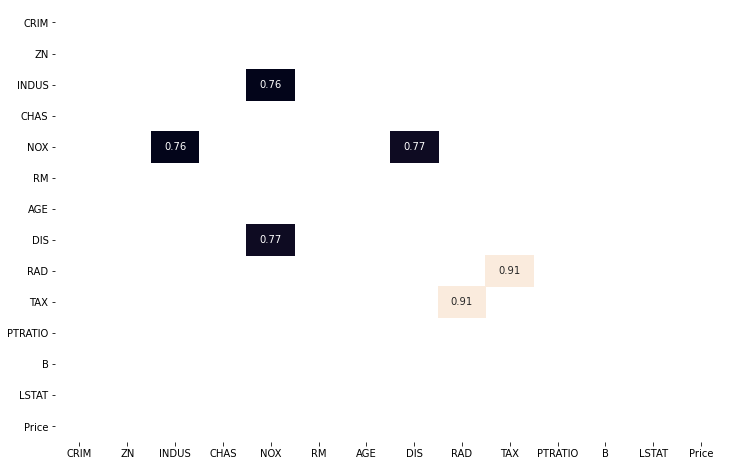

In [48]:
plt.rcParams["figure.figsize"] = (12, 8)

sns.heatmap(df_price.corr().abs()[(df_price.corr().abs()!=1) &
                                  (df_price.corr().abs() > 0.75)],
             annot=True,
             cbar = False); plt.show()

In [50]:
df_price.drop(columns=["NOX", "RAD"], inplace=True)

#### Create pipeline
##### Step 1: Data Preprocessing and scaling (mean=0, SD=1)
##### Step 2: Dimensionality reduction using Principal Component Analysis
##### Step 3: Fit model

In [59]:
# Number of PCs
pcs = 5

# Define pipeline for Logistic Regression classifier
lr_pipeline = Pipeline([("Scaling_1", StandardScaler()),
                        ("Dim_Red_1", PCA(n_components=pcs)),
                        ("Linear Regression", LinearRegression())])

# Define pipeline for Decision Tree classifier
dtree_pipeline = Pipeline([("Scaling_2", StandardScaler()),
                           ("Dim_Red_2", PCA(n_components=pcs)),
                           ("Decision Tree", DecisionTreeRegressor())])

# Define pipeline for Random Forest classifier
RF_pipeline = Pipeline([("Scaling_3", StandardScaler()),
                        ("Dim_Red_3", PCA(n_components=pcs)),
                        ("Random Forest", RandomForestRegressor())])

# Define pipeline for KNN classifier
KNN_pipeline = Pipeline([("Scaling_4", StandardScaler()),
                         ("Dim_Red_4", PCA(n_components=pcs)),
                         ("K-Nearest Neighbors", KNeighborsRegressor())])

# Define pipeline for Gradient boosting classifier
GBoost_pipeline = Pipeline([("Scaling_5", StandardScaler()),
                           ("Dim_Red_5", PCA(n_components=pcs)),
                           ("Gradient Boosting", GradientBoostingRegressor())])


# Create list of all above pipelines
concat_pipelines = [lr_pipeline, dtree_pipeline, RF_pipeline, KNN_pipeline, GBoost_pipeline]

#### Model Fitting


In [74]:
# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_price.drop(columns=["Price"]), 
                                                    df_price["Price"],
                                                    test_size=0.15)


# Fit each model in the pipeline on the training data
for model in tqdm(concat_pipelines):
  model.fit(X_train, y_train)

# Best performance on test data
leaderboard = pd.DataFrame([(model.steps[2][0], 
               model.score(X_train, y_train), 
               model.score(X_test, y_test),
               model) for model in concat_pipelines], 
             columns=["Algorithm", "Training Accuracy", "Validation Accuracy","FittedModel"]).sort_values(by=["Validation Accuracy"], 
                                                                                  ascending=False).reset_index(drop=True).head()

leaderboard.head()

100%|██████████| 5/5 [00:00<00:00, 13.68it/s]


,Algorithm,Training Accuracy,Validation Accuracy,FittedModel
0,Gradient Boosting,0.936914,0.896647,"(StandardScaler(copy=True, with_mean=True, wit..."
1,Random Forest,0.959167,0.886434,"(StandardScaler(copy=True, with_mean=True, wit..."
2,K-Nearest Neighbors,0.789324,0.862008,"(StandardScaler(copy=True, with_mean=True, wit..."
3,Decision Tree,1.000000,0.812888,"(StandardScaler(copy=True, with_mean=True, wit..."
4,Linear Regression,0.675223,0.797709,"(StandardScaler(copy=True, with_mean=True, wit..."
